In [1]:
import chainer
chainer.print_runtime_info()

Platform: Linux-5.4.0-81-generic-x86_64-with-Ubuntu-18.04-bionic
Chainer: 7.8.0
ChainerX: Not Available
NumPy: 1.19.5
CuPy:
  CuPy Version          : 7.8.0
  CUDA Root             : /usr/local/cuda
  CUDA Build Version    : 10010
  CUDA Driver Version   : 11010
  CUDA Runtime Version  : 10010
  cuBLAS Version        : 10201
  cuFFT Version         : 10101
  cuRAND Version        : 10101
  cuSOLVER Version      : (10, 2, 0)
  cuSPARSE Version      : 10300
  NVRTC Version         : (10, 1)
  cuDNN Build Version   : 7605
  cuDNN Version         : 7605
  NCCL Build Version    : 2708
  NCCL Runtime Version  : 2708
  CUB Version           : None
  cuTENSOR Version      : None
iDeep: Not Available


In [2]:
from sklearn.datasets import load_wine

x, t = load_wine(return_X_y=True)

print('x:', x.shape)
print('t:', t.shape)

# それぞれデータ型を変換
x = x.astype('float32')
t = t.astype('int32')

x: (178, 13)
t: (178,)


In [3]:
# データフレーム化
import pandas as pd

labels = load_wine().feature_names
df = pd.DataFrame(data=x, columns=labels)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
labels

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
#df.isnull().sum()
df.info()
#df.dtypes

#alcohol	アルコール
#malic acid	リンゴ酸
#ash	灰
#alcalinity of ash	灰のalcalinity
#magnesium	マグネシウム
#total phenols	総フェノール
#flavanoids	フラボノイド
#non flavanoid phenols	非フラボノイドフェノール類
#proanthocyanins	プロアントシアニン
#color intensity 	色の強さ
#hue	色合い
#od280/od315 of diluted wines	希釈されたワインのOD280 / od315
#proline	プロリン

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float32
 1   malic_acid                    178 non-null    float32
 2   ash                           178 non-null    float32
 3   alcalinity_of_ash             178 non-null    float32
 4   magnesium                     178 non-null    float32
 5   total_phenols                 178 non-null    float32
 6   flavanoids                    178 non-null    float32
 7   nonflavanoid_phenols          178 non-null    float32
 8   proanthocyanins               178 non-null    float32
 9   color_intensity               178 non-null    float32
 10  hue                           178 non-null    float32
 11  od280/od315_of_diluted_wines  178 non-null    float32
 12  proline                       178 non-null    float32
dtypes: fl

In [12]:
# 最頻値を取得
df['alcohol'].mode()

0    12.37
1    13.05
dtype: float32

In [13]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000619,2.336349,2.366517,19.494944,99.741570,2.295112,2.029269,0.361854,1.590899,5.058090,0.957449,2.611685,746.893250
std,0.811827,1.117146,0.274344,3.339564,14.282483,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907471
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200001,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [14]:
# データセットを分割するモジュールの読み込み
from sklearn.model_selection import train_test_split

x_train_val, t_train_val, x_test, t_test = train_test_split(x, t, test_size=0.3, random_state=0)
x_train, x_val, t_train, t_val = train_test_split(x_train_val, x_test, test_size=0.3, random_state=0)

In [21]:
#print('x_train_val => ', x_train_val.shape)
#print('x_test => ', x_test.shape)
print('x_train => ', x_train.shape) # 訓練データ
print('t_train => ', t_train.shape)
print('t_train_val => ', t_train_val.shape) # 確認データ
print('t_test => ', t_test.shape)
print('x_val => ', x_val.shape) # 検証データ
print('t_val => ', t_val.shape)

x_train =>  (86, 13)
t_train =>  (86,)
t_train_val =>  (54, 13)
t_test =>  (54,)
x_val =>  (38, 13)
t_val =>  (38,)


class 0 =>  31
class 1 =>  33
class 2 =>  22


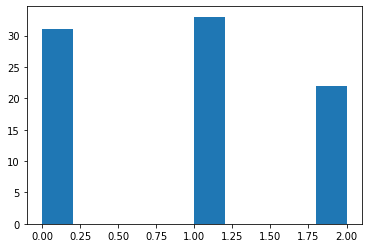

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.hist(t_train)
print('class 0 => ', np.sum(t_train==0))
print('class 1 => ', np.sum(t_train==1))
print('class 2 => ', np.sum(t_train==2))

In [23]:
print('x_train_val.shape => ', x_train_val.shape)
print('x_test.shape => ', x_test.shape)
print('t_train_val.shape => ', t_train_val.shape)
print('t_test.shape => ', t_test.shape)

x_train_val.shape =>  (124, 13)
x_test.shape =>  (124,)
t_train_val.shape =>  (54, 13)
t_test.shape =>  (54,)


In [24]:
# 正則化(過学習防止のため罰則を設ける)
from sklearn import preprocessing

mmscaler = preprocessing.MinMaxScaler()
mmscaler.fit(x_train_val)
x_train_val_mms = pd.DataFrame(mmscaler.transform(x_train_val))

x_train_val_mms.describe()

# スケール変換によって変わってしまった列名を戻す
x_train_val = x_train_val_mms.rename(columns={
    0: 'alcohol',
    1: 'malic_acid',
    2: 'ash',
    3: 'alcalinity_of_ash',
    4: 'magnesium',
    5: 'total_phenols',
    6: 'flavanoids',
    7: 'nonflavanoid_phenols',
    8: 'proanthocyanins',
    9: 'color_intensity',
    10: 'hue',
    11: 'od280/od315_of_diluted_wines',
    12: 'proline'
})
x_train_val.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.720430,0.203782,0.537634,0.309278,0.336957,0.543165,0.737003,0.250000,0.401899,0.240688,0.487179,1.000000,0.585425
1,0.319893,0.084034,0.311828,0.432990,0.239130,0.453237,0.480122,0.480769,0.525316,0.135626,0.273504,0.641026,0.000000
2,0.602151,0.712185,0.483871,0.484536,0.543478,0.176259,0.067278,0.557692,0.294304,0.851958,0.042735,0.106227,0.423482
3,0.572581,0.563025,0.424731,0.536082,0.347826,0.143885,0.024465,0.557692,0.278481,0.259790,0.051282,0.150183,0.419433
4,0.760752,0.130252,0.704301,0.742268,0.173913,0.665468,0.730887,0.134615,0.458861,0.200573,0.700855,0.692308,0.079352


In [25]:
mmscaler = preprocessing.MinMaxScaler()
mmscaler.fit(t_train_val)
t_train_val_mms = pd.DataFrame(mmscaler.transform(t_train_val))

t_train_val_mms.describe()

# スケール変換によって変わってしまった列名を戻す
t_train_val = t_train_val_mms.rename(columns={
    0: 'alcohol',
    1: 'malic_acid',
    2: 'ash',
    3: 'alcalinity_of_ash',
    4: 'magnesium',
    5: 'total_phenols',
    6: 'flavanoids',
    7: 'nonflavanoid_phenols',
    8: 'proanthocyanins',
    9: 'color_intensity',
    10: 'hue',
    11: 'od280/od315_of_diluted_wines',
    12: 'proline'
})
t_train_val.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.681287,0.183794,0.359477,0.165517,0.740741,0.637795,0.540084,0.16,0.528384,0.350000,0.488889,0.751004,0.557775
1,0.403509,0.381423,0.509804,0.551724,0.629630,0.196850,0.215190,0.22,0.371179,0.800000,0.000000,0.056225,0.144080
2,0.280702,0.077075,0.300654,0.344828,0.166667,0.992126,0.582278,0.12,0.637555,0.222727,0.822222,0.618474,0.101284
3,0.628655,0.195652,0.496732,0.448276,0.703704,0.779528,0.514768,0.14,0.890830,0.386364,0.555556,0.682731,0.600571
4,0.479532,1.000000,0.281046,0.517241,0.148148,0.645669,0.487342,0.34,0.698690,0.054545,0.277778,0.710843,0.072753


In [26]:
import chainer
from chainer import datasets, iterators
from chainer import Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions

chainer.config.debug = True

In [27]:
from chainer.datasets import TupleDataset

# 入力値と目標値を引数に与え、`TupleDataset` オブジェクトを作成
dataset = TupleDataset(np.array(x_train_val), np.array(x_test))
test = TupleDataset(np.array(t_train_val), np.array(t_test))

from chainer.datasets import split_dataset_random

n_train = int(len(dataset) * 0.75)
#n_valid = int(len(dataset) * 0.2)

train, valid = split_dataset_random(dataset, n_train, seed=0)
#valid, test = split_dataset_random(valid_test, n_valid, seed=0)

print('Training dataset size:', len(train))
print('Validation dataset size:', len(valid))
print('Test dataset size:', len(test))

Training dataset size: 93
Validation dataset size: 31
Test dataset size: 54


In [28]:
batchsize = 1
train_iter = iterators.SerialIterator(train, batch_size=batchsize, shuffle=True)
valid_iter = iterators.SerialIterator(valid, batch_size=batchsize, repeat=False, shuffle=False)
test_iter = iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

In [29]:
class DNN(Chain):
    def __init__(self, n_mid_units=13, n_out=3):
        super(DNN, self).__init__()
        #super().__init__()
        
        with self.init_scope():
            #self.l1 = L.Linear(None, n_mid_units)
            #self.l2 = L.Linear(n_mid_units, n_mid_units)
            #self.l3 = L.Linear(n_mid_units, n_mid_units)
            #self.l4 = L.Linear(n_mid_units, n_out)
            
            # swish
            self.l1 = L.Linear(None, n_mid_units)
            self.s1 = L.Swish(None)
            self.l2 = L.Linear(None, n_mid_units)
            self.s2 = L.Swish(None)
            self.l3 = L.Linear(None, n_out)
 
    def __call__(self, x):
        #h1 = F.selu(self.l1(x))
        #h2 = F.selu(self.l2(h1))
        #h3 = F.selu(self.l3(h2))
        #h1 = F.relu(self.l1(x))
        #h2 = F.relu(self.l2(h1))
        #h3 = F.relu(self.l3(h2))
        #y = self.l4(h3)
        # swish
        h1 = self.s1(self.l1(x))
        h2 = self.s2(self.l2(h1))
        y = self.l3(h2)
        return y

In [30]:
gpu_id = 0
model = DNN()
    
model_loss = L.Classifier(model)

if gpu_id >= 0:
    model_loss.to_gpu(gpu_id)

#optimizer = optimizers.SGD()
optimizer = optimizers.Adam()
#optimizer = optimizers.MomentumSGD(lr=0.1)
optimizer.setup(model_loss)

updater = training.StandardUpdater(train_iter, optimizer, device=gpu_id)

In [31]:
from chainer.training import extensions as E

n_epoch = 30

# トレーナーのセットアップ
trainer = chainer.training.Trainer(
    updater, (n_epoch, 'epoch'), out='result', extensions=[
        E.Evaluator(valid_iter, model_loss, device=gpu_id),
        E.dump_graph('main/loss'),
        E.LogReport(),
        E.PlotReport(['main/loss', 'validation/main/loss'],'epoch', file_name='loss.png'),
        E.PlotReport(['main/accuracy', 'validation/main/accuracy'],'epoch', file_name='accuracy.png'),
        E.PrintReport(['epoch', 'main/loss', 'validation/main/loss',
                       'main/accuracy', 'validation/main/accuracy', 'elapsed_time'])
    ]
)

In [32]:
trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
1           1.11994     1.08245               0.268817       0.322581                  2.92488       
2           1.05418     1.03937               0.483871       0.354839                  3.94346       
3           0.980552    0.956121              0.602151       0.451613                  4.9422        
4           0.85575     0.78627               0.752688       0.774194                  6.02775       
5           0.674744    0.541461              0.827957       0.967742                  7.05605       
6           0.477085    0.399427              0.935484       0.935484                  8.09954       
7           0.331668    0.293395              0.946237       0.935484                  9.10876       
8           0.251165    0.2074                0.967742       0.935484                  10.1162       
9           0.20538     0.168276              0.978495       0.967742               

In [33]:
from IPython.display import Image

Image(filename='result/cg.png')

FileNotFoundError: [Errno 2] No such file or directory: 'result/cg.png'

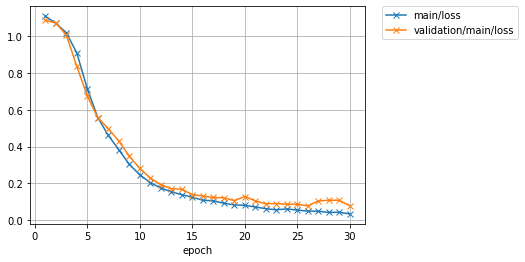

In [24]:
Image(filename='result/loss.png')

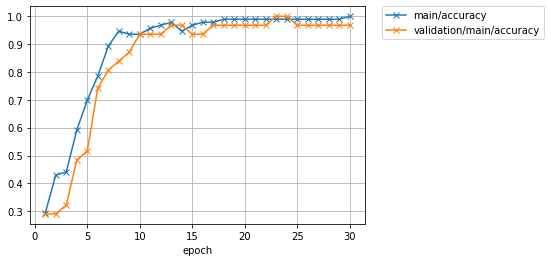

In [25]:
Image(filename='result/accuracy.png')

In [26]:
test_evalutor = E.Evaluator(test_iter, model_loss, device=gpu_id)
results = test_evalutor()

print('Test accuracy:', results['main/accuracy'])

Test accuracy: 0.9629629629629629


In [27]:
from chainer import serializers

serializers.save_npz('my_wine.model', model)

%ls -la my_wine.model

-rw-r--r-- 1 toshiya toshiya 3256  6月 14 10:05 my_wine.model


In [28]:
infer_model = DNN()

serializers.load_npz('my_wine.model', infer_model)

if gpu_id >= 0:
    infer_model.to_gpu(gpu_id)
    
x, t = test[1]
print('Class:', t)

Class: 2


In [31]:
t_val[0]

1

In [26]:
wine = load_wine()
first_two_features = wine.data[:, :2]
print(wine.data)
#print(first_two_features)
teacher_labels = wine.target
print(teacher_labels)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


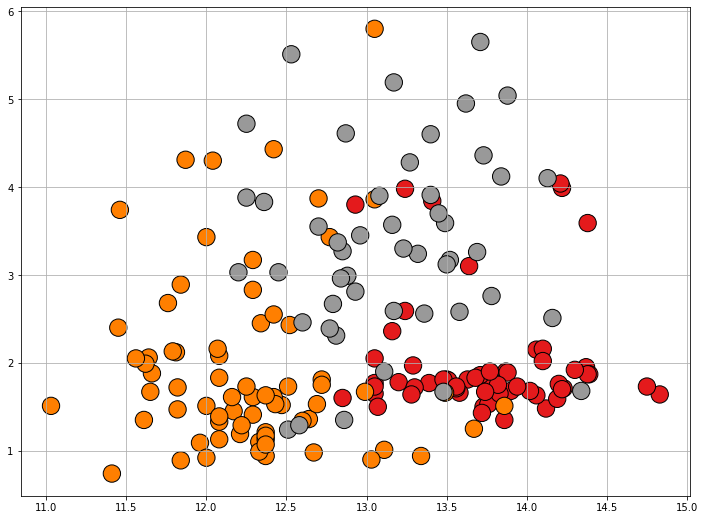

In [27]:
### (参考)2019年の機械学習を始めるにはscikit-learnでしょう！
### https://kokensha.xyz/ml/machine-learning-study-with-scikit-learn-2019/

wine = load_wine()
first_two_features = wine.data[:, :2]
#print(wine.data)
#print(first_two_features)
teacher_labels = wine.target
#print(teacher_labels)

# sciket-learnの(PCA)主成分分析を使う
from sklearn.decomposition import PCA

all_features = wine.data[:, :2]
feature_reduced = PCA(n_components=2).fit_transform(wine.data)

x_min, x_max = all_features[:, 0].min(), all_features[:, 0].max()
y_min, y_max = all_features[:, 1].min(), all_features[:, 1].max()

plt.figure(2, figsize=(12, 9))
plt.clf()

plt.scatter(all_features[:, 0], all_features[:, 1], s=300, c=teacher_labels,cmap=plt.cm.Set1,
            edgecolor='k')
plt.grid(True)

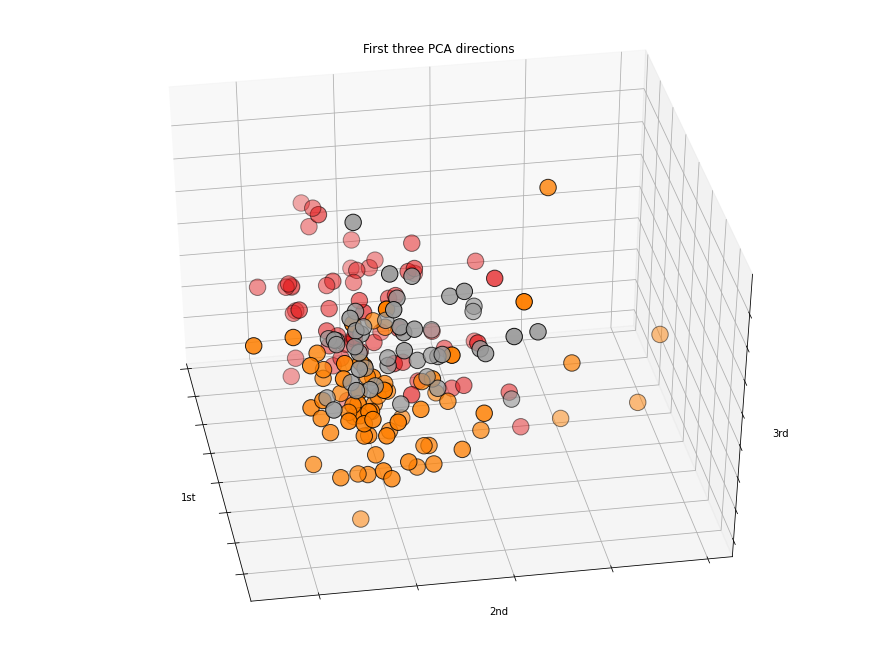

In [28]:
from mpl_toolkits.mplot3d import Axes3D
# ３次元で表現
fig = plt.figure(1, figsize=(12, 9))
ax = Axes3D(fig, elev=-140, azim=10)
feature_reduced = PCA(n_components=3).fit_transform(wine.data)
ax.scatter(feature_reduced[:, 0], feature_reduced[:, 1], feature_reduced[:, 2],c=teacher_labels,
           cmap=plt.cm.Set1, edgecolor='k', s=270)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st")
ax.w_xaxis.set_ticklabels([])
# 
ax.set_ylabel("2nd")
ax.w_yaxis.set_ticklabels([])
# 
ax.set_zlabel("3rd")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [16]:
import chainer.links as L
import chainer.functions as F
from chainer import Sequential

n_input = 13
n_hidden = 26
n_output = 3

net = Sequential(
    L.Linear(n_input, n_hidden), F.relu,
    L.Linear(n_hidden, n_hidden), F.relu,
    L.Linear(n_hidden, n_output)
)

#optimizer = chainer.optimizers.SGD(lr=0.01)
optimizer = chainer.optimizers.Adam()
optimizer.setup(net)

In [35]:
import numpy as np

n_epoch = 50
n_batchsize = 16
iteration = 0

# ログの保存用
results_train = {
    'loss': [],
    'accuracy': []
}
results_valid = {
    'loss': [],
    'accuracy': []
}


for epoch in range(n_epoch):

    # データセット並べ替えた順番を取得
    order = np.random.permutation(range(len(x_train)))

    # 各バッチ毎の目的関数の出力と分類精度の保存用
    loss_list = []
    accuracy_list = []

    for i in range(0, len(order), n_batchsize):
        # バッチを準備
        index = order[i:i+n_batchsize]
        x_train_batch = x_train[index,:]
        t_train_batch = t_train[index]

        # 予測値を出力
        y_train_batch = net(x_train_batch)

        # 目的関数を適用し、分類精度を計算
        loss_train_batch = F.softmax_cross_entropy(y_train_batch, t_train_batch)
        accuracy_train_batch = F.accuracy(y_train_batch, t_train_batch)

        loss_list.append(loss_train_batch.array)
        accuracy_list.append(accuracy_train_batch.array)

        # 勾配のリセットと勾配の計算
        net.cleargrads()
        loss_train_batch.backward()

        # パラメータの更新
        optimizer.update()

        # カウントアップ
        iteration += 1

    # 訓練データに対する目的関数の出力と分類精度を集計
    loss_train = np.mean(loss_list)
    accuracy_train = np.mean(accuracy_list)

    # 1エポック終えたら、検証データで評価
    # 検証データで予測値を出力
    with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
        y_val = net(x_val)

    # 目的関数を適用し、分類精度を計算
    loss_val = F.softmax_cross_entropy(y_val, t_val)
    accuracy_val = F.accuracy(y_val, t_val)

    # 結果の表示
    print('epoch: {}, iteration: {}, loss (train): {:.4f}, loss (valid): {:.4f}'.format(
        epoch, iteration, loss_train, loss_val.array))

    # ログを保存
    results_train['loss'] .append(loss_train)
    results_train['accuracy'] .append(accuracy_train)
    results_valid['loss'].append(loss_val.array)
    results_valid['accuracy'].append(accuracy_val.array)

epoch: 0, iteration: 6, loss (train): 0.0600, loss (valid): 0.2108
epoch: 1, iteration: 12, loss (train): 0.0607, loss (valid): 0.2283
epoch: 2, iteration: 18, loss (train): 0.0637, loss (valid): 0.2095
epoch: 3, iteration: 24, loss (train): 0.0572, loss (valid): 0.2133
epoch: 4, iteration: 30, loss (train): 0.1294, loss (valid): 0.2421
epoch: 5, iteration: 36, loss (train): 0.0831, loss (valid): 0.2958
epoch: 6, iteration: 42, loss (train): 0.1087, loss (valid): 0.1885
epoch: 7, iteration: 48, loss (train): 0.0980, loss (valid): 0.3636
epoch: 8, iteration: 54, loss (train): 0.0713, loss (valid): 0.1900
epoch: 9, iteration: 60, loss (train): 0.0658, loss (valid): 0.2336
epoch: 10, iteration: 66, loss (train): 0.0628, loss (valid): 0.2101
epoch: 11, iteration: 72, loss (train): 0.0741, loss (valid): 0.2274
epoch: 12, iteration: 78, loss (train): 0.0895, loss (valid): 0.2063
epoch: 13, iteration: 84, loss (train): 0.0740, loss (valid): 0.1876
epoch: 14, iteration: 90, loss (train): 0.069

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

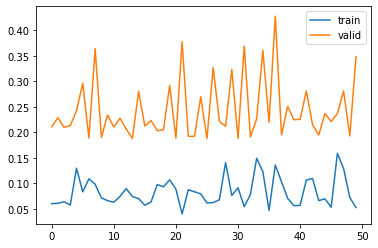

In [37]:
plt.plot(results_train['loss'], label='train')  # label で凡例の設定
plt.plot(results_valid['loss'], label='valid')  # label で凡例の設定
plt.legend()  # 凡例の表示

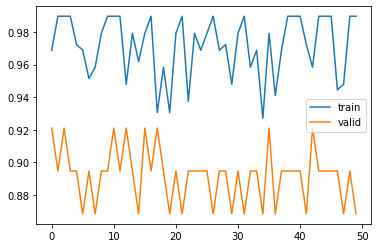

In [38]:
# 分類精度 (accuracy)
plt.plot(results_train['accuracy'], label='train')  # label で凡例の設定
plt.plot(results_valid['accuracy'], label='valid')  # label で凡例の設定
plt.legend()  # 凡例の表示

In [39]:
# テストデータで予測値を計算
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    y_test = net(x_test)

In [40]:
accuracy_test = F.accuracy(y_test, t_test)
accuracy_test.array

array(0.962963, dtype=float32)

In [16]:
chainer.serializers.save_npz('my_wine.net', net)

In [17]:
!ls

'00 ColaboratoryでChainerを動かしてみよう.ipynb'
'01 Chainerの基本的な使い方を学んでみよう.ipynb'
'02 Chainerでkaggleの問題を解こう！.ipynb'
'14. Chainer の基礎.ipynb'
'DCGAN(Generate images with Deep Convolutional GAN).ipynb'
 Pipfile
 Pipfile.lock
 Pipfile~
 Trainerを使ってみよう.ipynb
'Underfitting vs. Overfitting.ipynb'
'Word2Vec(Obtain word embeddings).ipynb'
 chainer
 chainerrl-quickstart
 content
 digit-recognizer.zip
 graph.png
 lecture
 mnist_result
 my_iris.net
 my_mnist.model
 my_wine.net
 out
 v5.1.0.tar.gz
 word2vec.model
 word2vec_result
 学習ループを書いてみよう.ipynb


In [2]:
# データフレーム化
import pandas as pd

labels = load_wine().feature_names
df = pd.DataFrame(data=x, columns=labels)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)

df = pd.DataFrame(data=x_scaler, columns=labels)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518612,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246289,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406050,1.113449,0.965242
2,0.196879,0.021231,1.109335,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788588,1.395148
3,1.691549,-0.346811,0.487926,-0.809251,0.930918,2.491445,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184072,2.334574
4,0.295700,0.227694,1.840402,0.451946,1.281985,0.808997,0.663351,0.226795,0.401405,-0.319275,0.362177,0.449601,-0.037874


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_scaler, t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print('訓練データの相関関係(決定係数) : ', model.score(x_scaler, t))

訓練データの相関関係(決定係数) :  0.9000888613071732


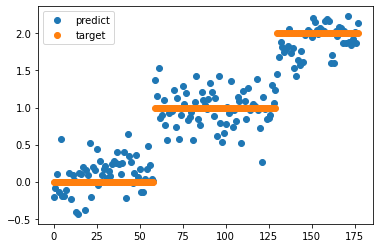

In [9]:
plt.plot(model.predict(x_scaler),'o',label="predict")
plt.plot(t,'o',label='target')
plt.legend()

In [10]:
print('重み', model.coef_)
print('バイアス', model.intercept_)

重み [-0.09471978  0.03361075 -0.04063968  0.13272172 -0.00697541  0.09006874
 -0.37092003 -0.0376622   0.02246263  0.17482463 -0.03401731 -0.19119658
 -0.22017263]
バイアス 0.9382022


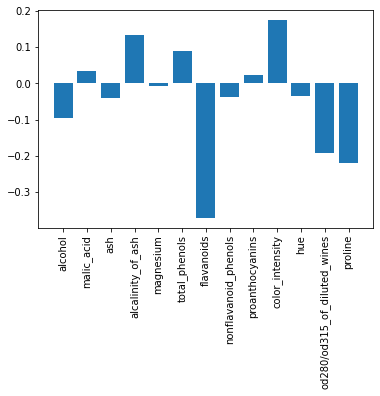

In [11]:
# 重みの値の比較
plt.bar(x=labels, height=model.coef_)
plt.xticks(rotation=90)
plt.show()